In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from operator import xor
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.svm import SVR
warnings.filterwarnings('ignore')




from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean

import prediccion
import algoritmos

dataset = pd.read_csv('Posicion_salarios.csv')
dataset


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
X, y


(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

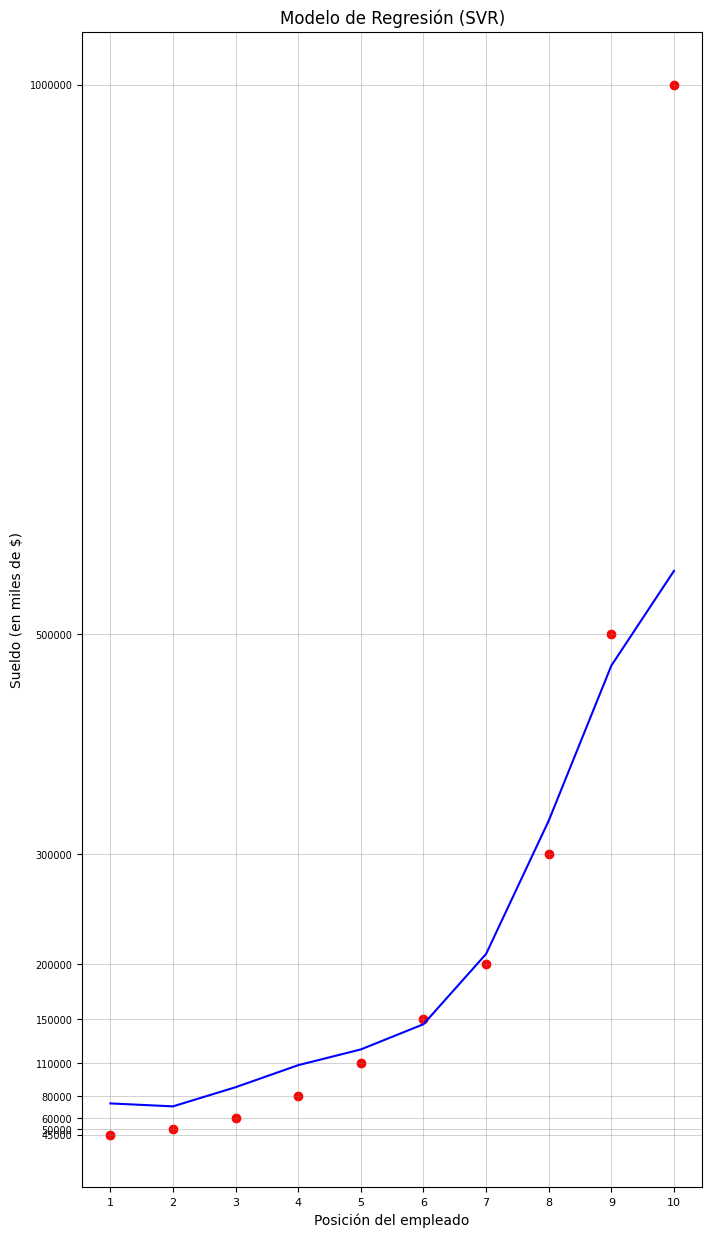

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))
regression = SVR(kernel = "rbf")
regression.fit(X, y)
x_trans = sc_X.transform(np.array([[6.5]]))
y_pred = regression.predict(x_trans) 
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))
plt.figure(figsize=(8,15))
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en miles de $)")
plt.xticks(X[:,0],list(dataset['Level']), fontsize=8)
plt.yticks(y[:,0],list(dataset['Salary']), fontsize=7)
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [12]:
X_poly.shape

(10, 3)

In [13]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression()

In [14]:
y_pred = lin_reg_2.predict(X_poly)
y_pred.shape

(10, 1)